In [56]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
#importing the data 
data = pd.read_csv('Ads_CTR_Optimisation.csv')

N = len(data.index) #Number of observation(users)
num_of_ad = data.shape[1]
ads_selected = [] #keep the selected ad for each round

## Upper confidence bound algorithm

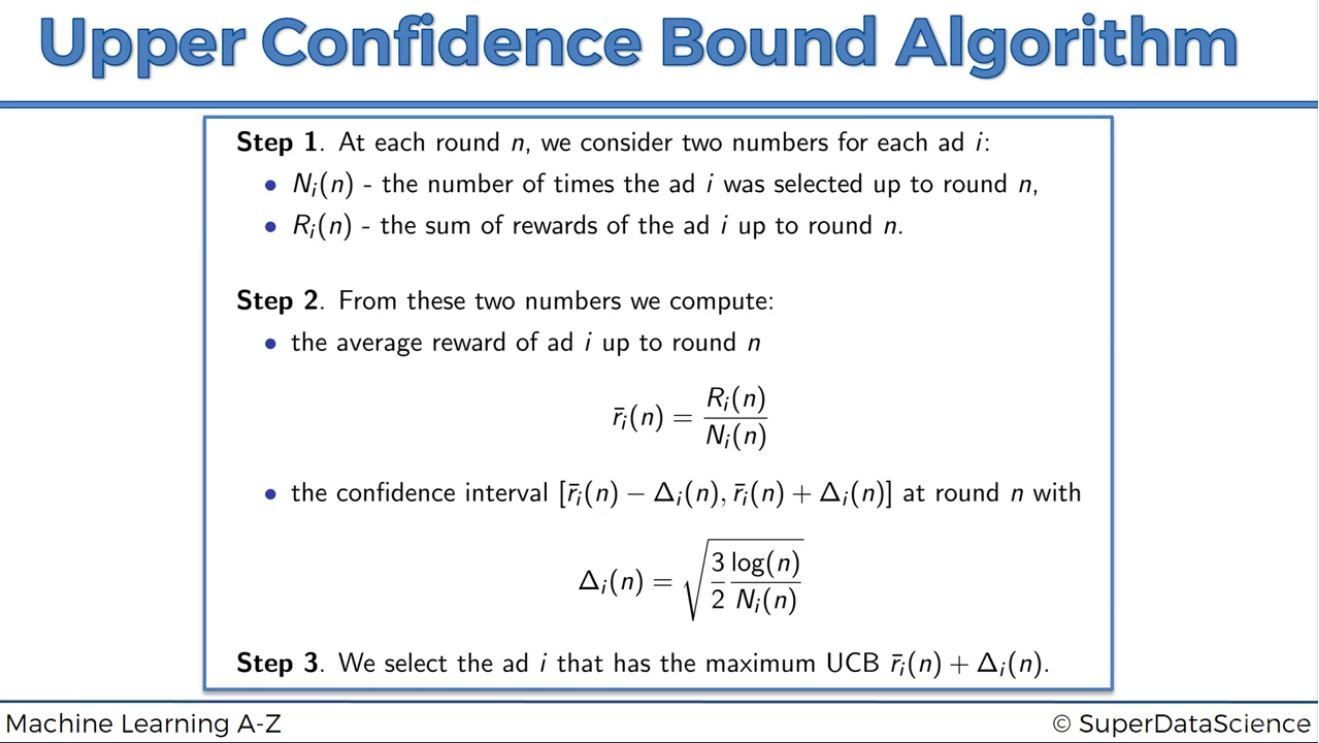

In [58]:
#Upper confidence bound algorithm 

import math

num_of_selections = [0] * num_of_ad  #Number of time a particular ad was selected
sum_of_rewards =  [0] * num_of_ad #Sum of reward of a particular ad for N users
total_reward = 0


for n in range(0, N):
    
    ad_index = 0
    max_upper_bound = 0
    
    for each_version_ad in range(0,num_of_ad):
        
        if(num_of_selections[each_version_ad] > 0):
            average_reward = sum_of_rewards[each_version_ad] / num_of_selections[each_version_ad]
            #print(num_of_selections[each_version_ad])
            #we use n+1 becasue the index in python start from 0
            
            delta_each_version_ad = math.sqrt(3/2 * math.log(n+1) / num_of_selections[each_version_ad])
            upper_bound = average_reward + delta_each_version_ad
        else: 
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            
            #keep track of the index with the max_upper_bound 
            ad_index = each_version_ad
    
    ads_selected.append(ad_index)
    
    num_of_selections[ad_index] = num_of_selections[ad_index]  + 1 
    
    reward = data.values[n,ad_index]
    
    sum_of_rewards[ad_index] = sum_of_rewards[ad_index] + reward
    total_reward = total_reward + reward
    
print("Total reward {}".format(total_reward))
print ("ads_selected {}".format(ads_selected))

Total reward 2178
ads_selected [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2,

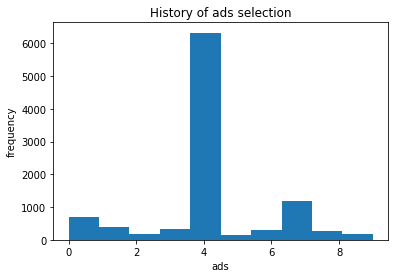

In [59]:
plt.hist(ads_selected)
plt.title('History of ads selection')
plt.xlabel('ads')
plt.ylabel('frequency')
plt.show()

## Thompson sampling 

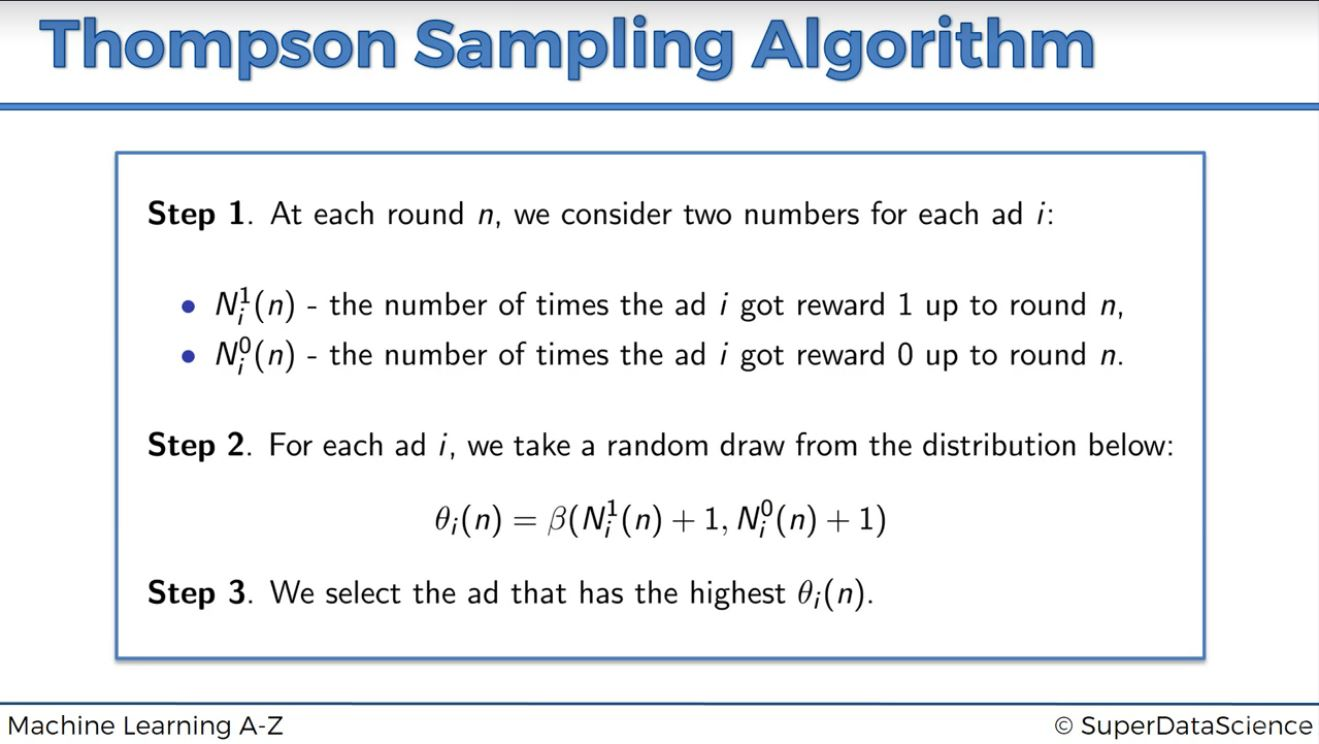

In [60]:
import random
num_of_rewards_1 = [0] * num_of_ad
num_of_rewards_0 = [0] * num_of_ad

for n in range(0, N):
    
    ad_index = 0
    max_random_drawn = 0
    
    for each_version_ad in range(0,num_of_ad):
        random_beta  = random.betavariate(num_of_rewards_1[each_version_ad] + 1, num_of_rewards_0[each_version_ad] + 1)
        
            
        if random_beta > max_random_drawn:
            max_random_drawn = random_beta
            
            #keep track of the index with the max_upper_bound 
            ad_index = each_version_ad
    
    ads_selected.append(ad_index) 
    
    reward = data.values[n,ad_index]
    if reward == 1:
        num_of_rewards_1[each_version_ad] = num_of_rewards_1[each_version_ad] + 1
    else:
        num_of_rewards_0[each_version_ad] = num_of_rewards_0[each_version_ad] + 1
        
    total_reward = total_reward + reward
    
print("Thompson Sampling algorithm Total reward {}".format(total_reward))
print ("Thompson Sampling algorithm  ads_selected {}".format(ads_selected))



Thompson Sampling algorithm Total reward 3524
Thompson Sampling algorithm  ads_selected [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7,

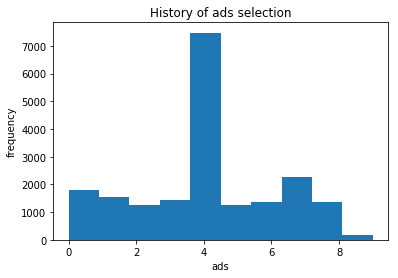

In [61]:
plt.hist(ads_selected)
plt.title('History of ads selection')
plt.xlabel('ads')
plt.ylabel('frequency')
plt.show()